In [1]:
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import math
nltk.download('punkt')
news_data = pd.read_csv('work\\fox_news.csv')
def generate_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = nltk.ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

def get_n_grams(df, n_grams=2, top_n=10):
    ngram_data = []
    
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        all_ngrams = Counter()
        
        for text in category_data['Corpus']:
            ngrams = generate_ngrams(text, n_grams)
            all_ngrams.update(ngrams)
        
        top_ngrams = all_ngrams.most_common(top_n)
        for ngram, count in top_ngrams:
            ngram_data.append((category, ngram, count))
    
    ngram_df = pd.DataFrame(ngram_data, columns=['category', 'words', 'counts'])
    return ngram_df

def plot_ngram(df, type="bigrams"):
    categories = df['category'].unique()
    num_categories = len(categories)
    num_cols = 2
    num_rows = math.ceil(num_categories / num_cols)

    plt.figure(figsize=(15, num_rows * 4))
    plt.subplots_adjust(hspace=0.5)

    for n, category in enumerate(categories):
        ax = plt.subplot(num_rows, num_cols, n + 1)
        ax.set_title(f"Most used {type} in {category}")
        data = df[df['category'] == category][['words', 'counts']].set_index("words").sort_values(by="counts", ascending=True)
        data.plot(ax=ax, kind='barh')
        plt.ylabel("")
    plt.tight_layout()
    plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


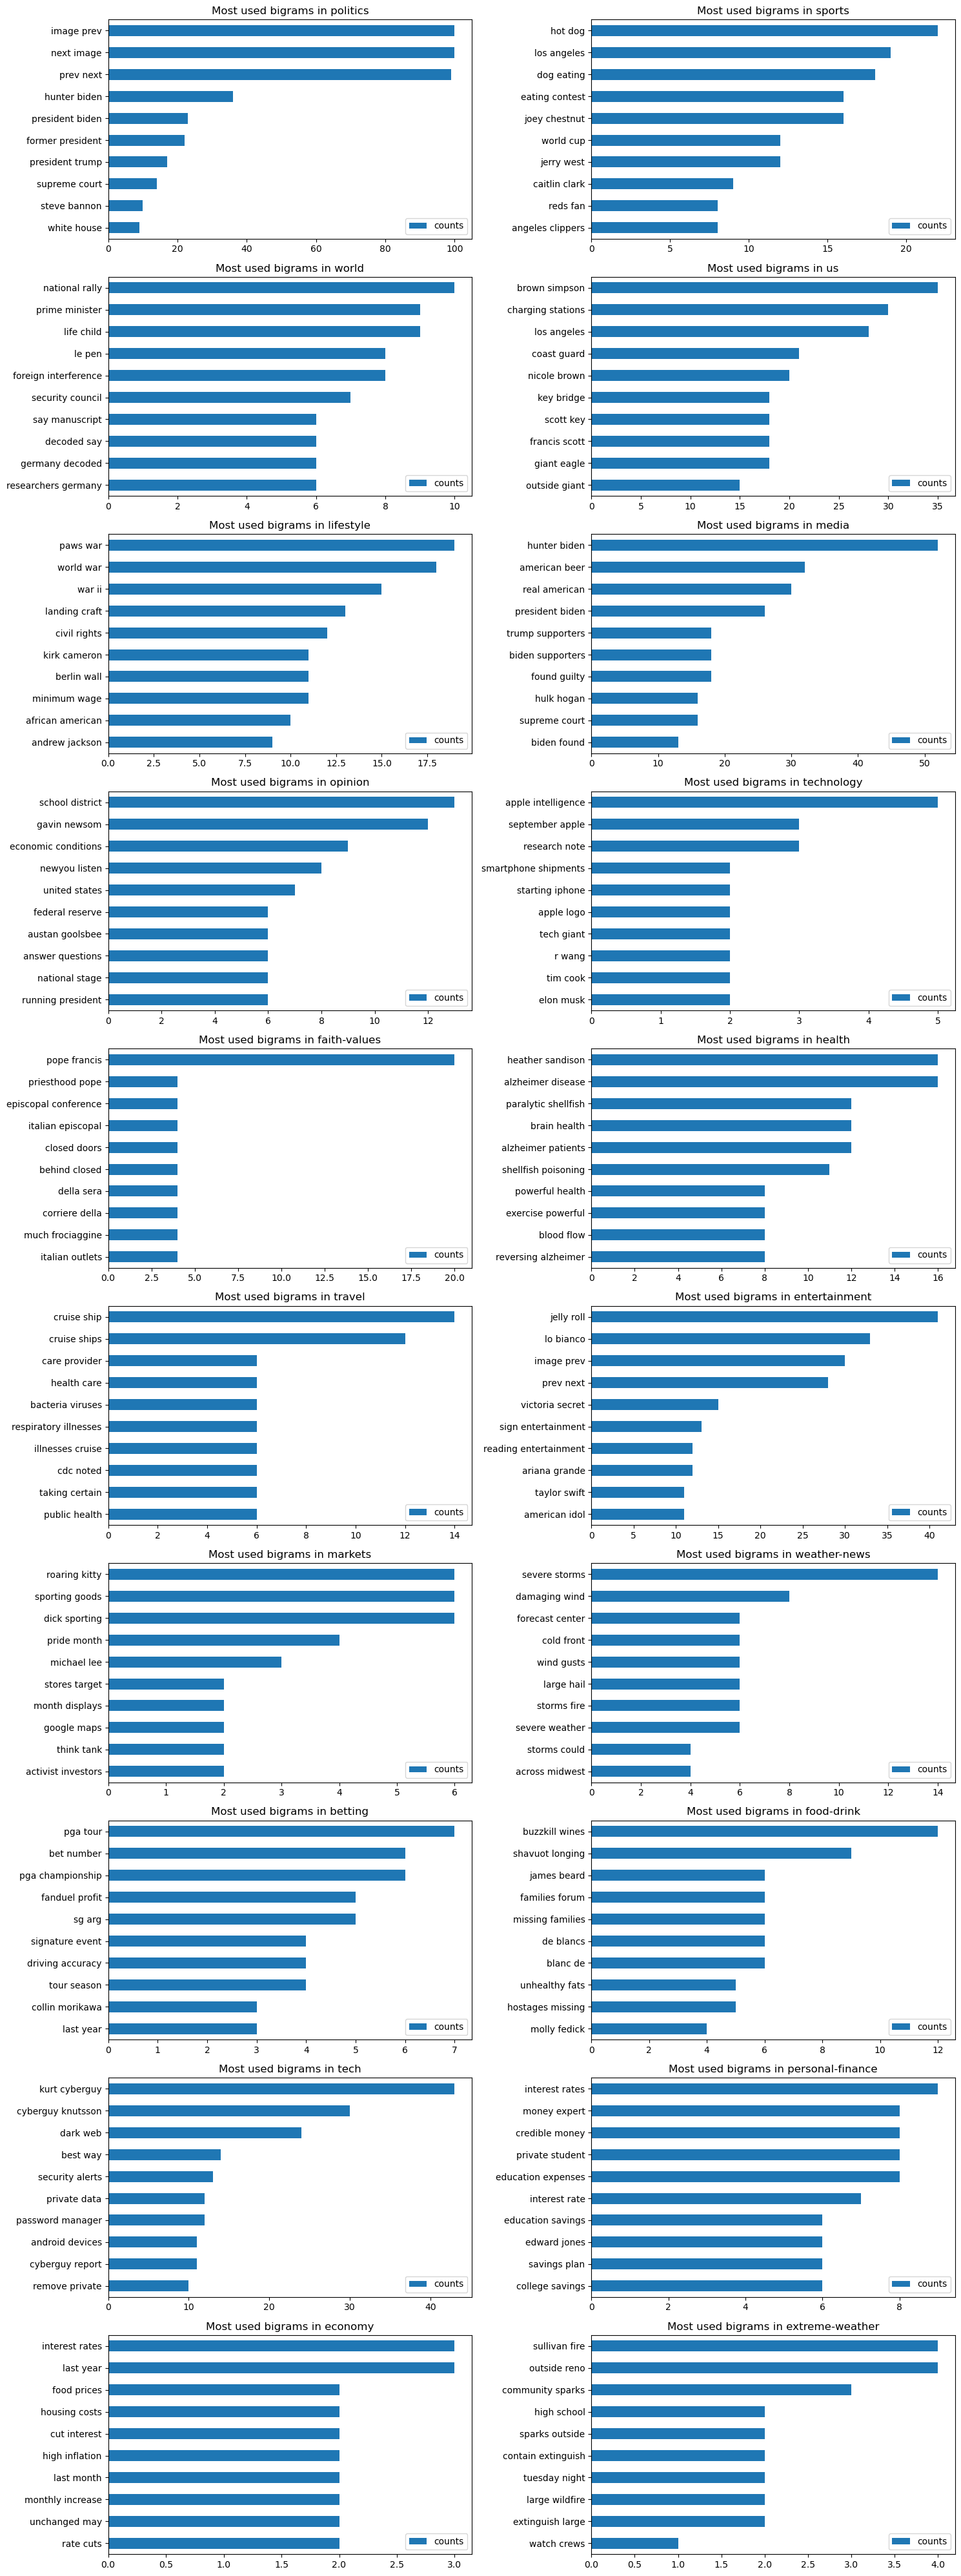

In [2]:
# plot bigram
bigrams = get_n_grams(news_data, n_grams=2, top_n=10)
plot_ngram(bigrams, type="bigrams")


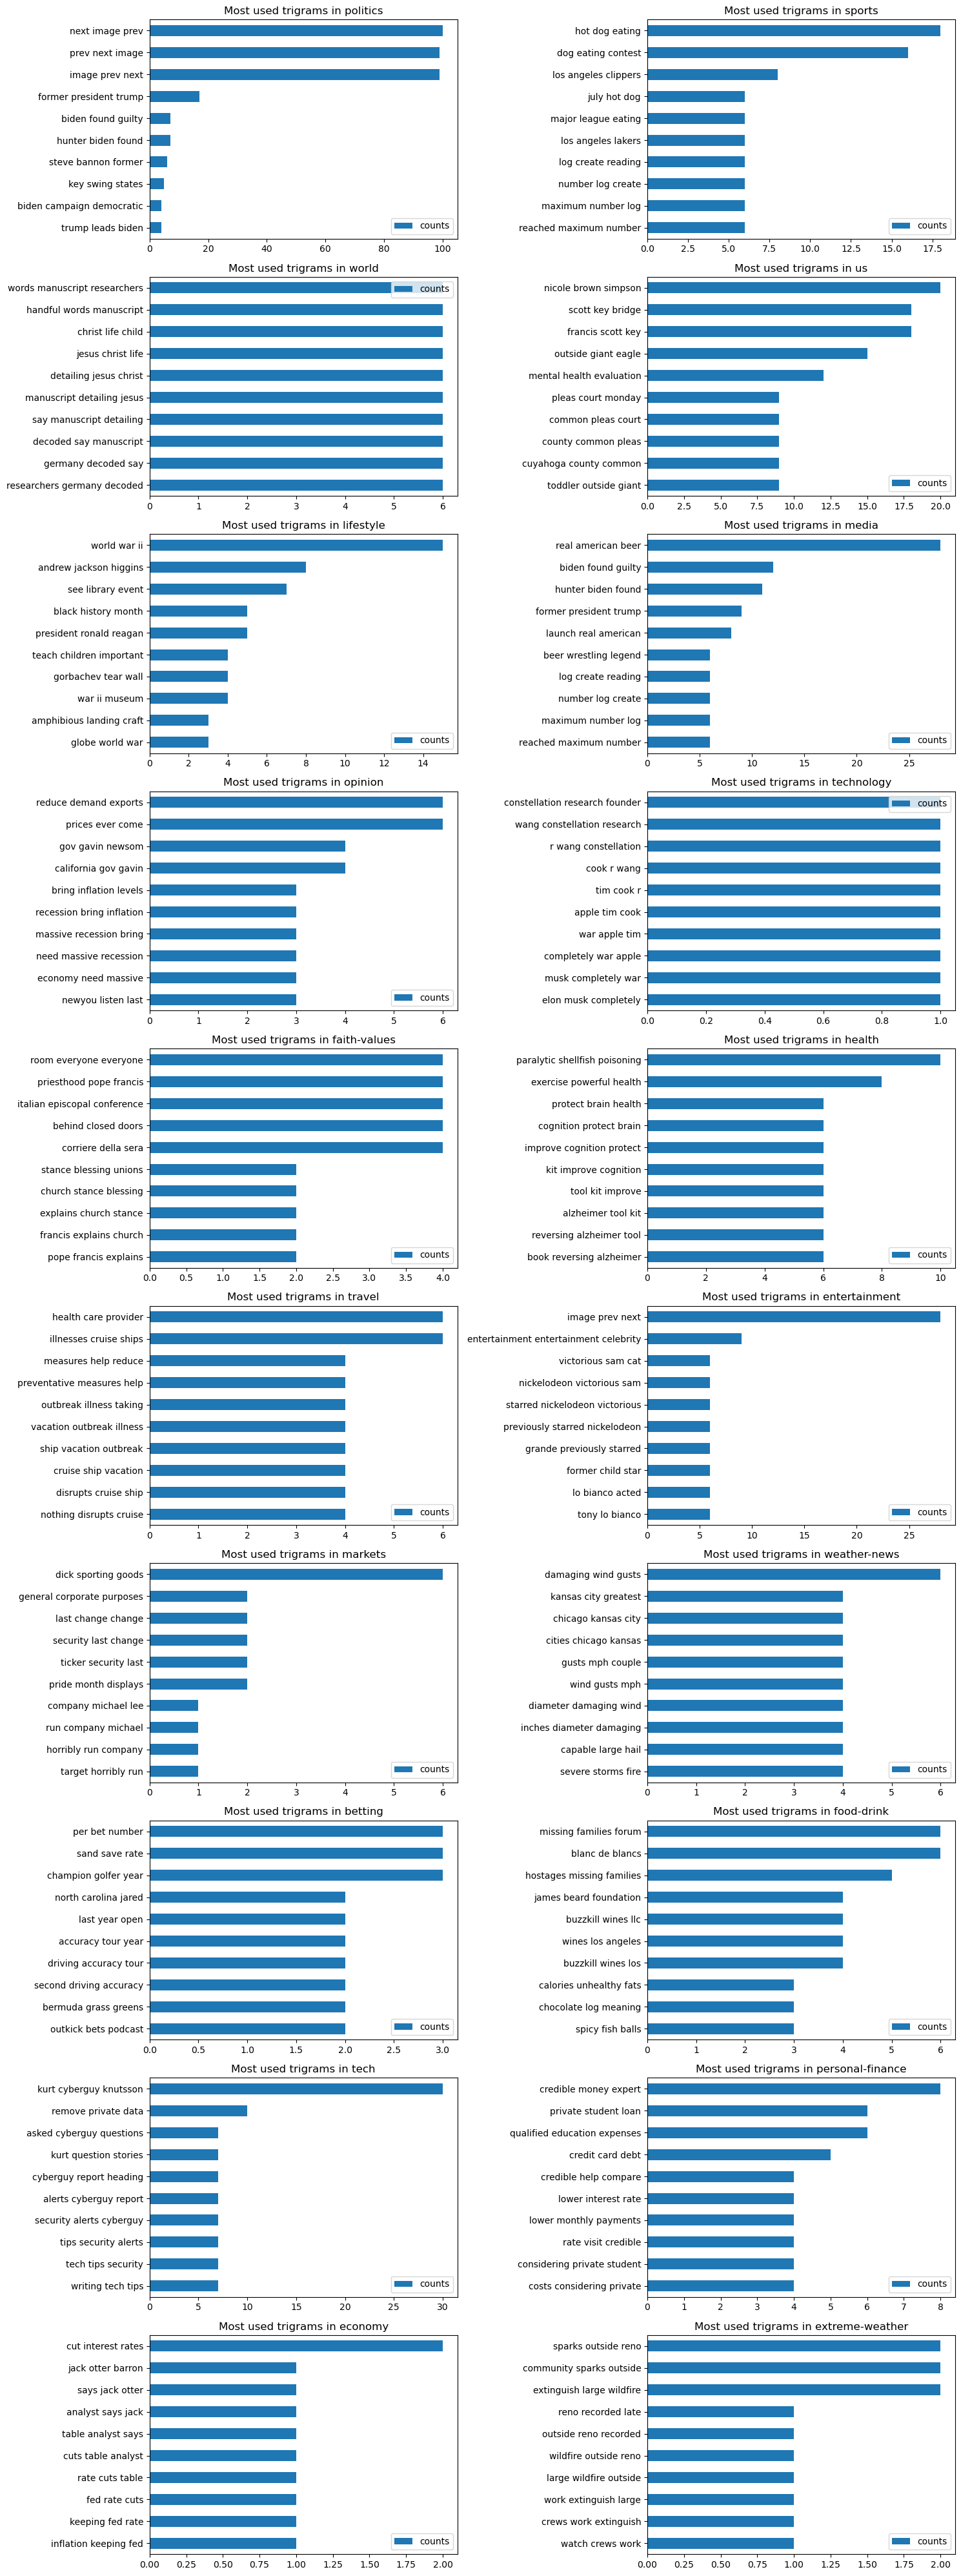

In [3]:
# Generate and plot trigrams
trigrams = get_n_grams(news_data, n_grams=3, top_n=10)
plot_ngram(trigrams, type="trigrams")
